<a href="https://colab.research.google.com/github/adeshsingh5505/BoilerEfficiency/blob/main/boilerxgboost_parametric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas numpy scikit-learn tensorflow joblib


In [2]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import os

# Check if dataset file exists
data_path = "/content/data_modified19.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset file not found at: {data_path}")

# Load dataset
try:
    df = pd.read_csv(data_path)
except Exception as e:
    raise Exception(f"Error loading dataset: {e}")

# Verify required columns
target = "Boiler outlet steam temperature"
if target not in df.columns or "date" not in df.columns:
    raise KeyError("Required columns ('date' or target) not found in dataset")

# Define target and features
X = df.drop(columns=["date", target])
y = df[target]

# Verify data types and handle missing values
if not X.select_dtypes(include=np.number).columns.equals(X.columns):
    print("Warning: Non-numeric columns detected. Consider preprocessing.")
X = X.fillna(X.mean(numeric_only=True))
y = y.fillna(y.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model with specified parameters
xgb_params = {
    'max_depth': 16,
    'learning_rate': 0.05,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Train model
try:
    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)
except Exception as e:
    raise Exception(f"Error training model: {e}")

# Predictions
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate percentage errors
absolute_errors = np.abs(y_test - y_test_pred)
# Avoid division by zero by setting percentage error to 0 where y_test is 0
percentage_errors = np.where(
    y_test != 0,
    (absolute_errors / np.abs(y_test)) * 100,
    0
)
max_error_percent = np.max(percentage_errors)
min_error_percent = np.min(percentage_errors)
mean_absolute_percentage_error = np.mean(percentage_errors)

# Print results
print("Model Parameters:", xgb_params)
print(f"✅ Train R² Score: {train_r2:.4f}")
print(f"✅ Test R² Score: {test_r2:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Maximum Error (%): {max_error_percent:.4f}%")
print(f"Minimum Error (%): {min_error_percent:.4f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error:.4f}%")

# Check for overfitting
if train_r2 - test_r2 > 0.1:
    print("Warning: Potential overfitting detected (Train R² >> Test R²)")

Model Parameters: {'max_depth': 16, 'learning_rate': 0.05, 'n_estimators': 100, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'objective': 'reg:squarederror', 'random_state': 42}
✅ Train R² Score: 0.9996
✅ Test R² Score: 0.9932
Test MSE: 0.1286
Test RMSE: 0.3586
Maximum Error (%): 1.2311%
Minimum Error (%): 0.0000%
Mean Absolute Percentage Error (MAPE): 0.0386%


Results for target: Temperature in the upper part of the furnace chamber (right)
Model Parameters: {'max_depth': 16, 'learning_rate': 0.05, 'n_estimators': 100, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'objective': 'reg:squarederror', 'random_state': 42}
✅ Train R² Score: 0.9993
✅ Test R² Score: 0.9900
Test MSE: 1.1347
Test RMSE: 1.0652
Maximum Error (%): 1.9251%
Minimum Error (%): 0.0000%
Mean Absolute Percentage Error (MAPE): 0.0961%


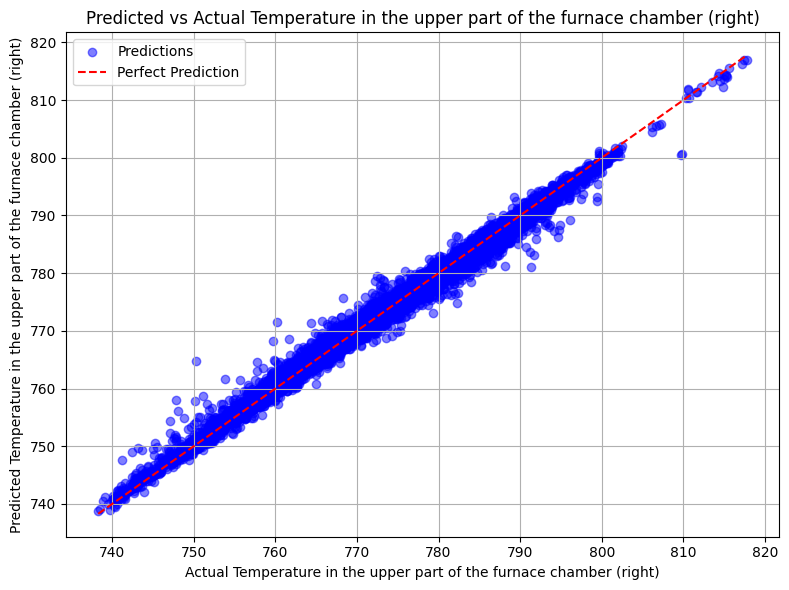

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import os
import matplotlib.pyplot as plt

# Check if dataset file exists
data_path = "/content/data_modified19.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset file not found at: {data_path}")

# Load dataset
try:
    df = pd.read_csv(data_path)
except Exception as e:
    raise Exception(f"Error loading dataset: {e}")

# Define new target (replace with your desired target column)
new_target = "Temperature in the upper part of the furnace chamber (right)"  # e.g., "Boiler pressure", "Steam flow rate"
if new_target not in df.columns:
    raise KeyError(f"New target column '{new_target}' not found in dataset")
if "date" not in df.columns:
    raise KeyError("Required column 'date' not found in dataset")

# Define target and features
# Exclude original target to avoid potential leakage
X = df.drop(columns=["date", new_target, "Boiler outlet steam temperature"])
y = df[new_target]

# Verify data types and handle missing values
if not X.select_dtypes(include=np.number).columns.equals(X.columns):
    print("Warning: Non-numeric columns detected in features. Consider preprocessing.")
if not np.issubdtype(y.dtype, np.number):
    raise ValueError(f"New target '{new_target}' must be numeric for regression")
X = X.fillna(X.mean(numeric_only=True))
y = y.fillna(y.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model with same parameters as previous model
xgb_params = {
    'max_depth': 16,
    'learning_rate': 0.05,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Train new model
try:
    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)
except Exception as e:
    raise Exception(f"Error training model for new target '{new_target}': {e}")

# Predictions
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate percentage errors
absolute_errors = np.abs(y_test - y_test_pred)
percentage_errors = np.where(
    y_test != 0,
    (absolute_errors / np.abs(y_test)) * 100,
    0
)
max_error_percent = np.max(percentage_errors)
min_error_percent = np.min(percentage_errors)
mean_absolute_percentage_error = np.mean(percentage_errors)

# Print results
print(f"Results for target: {new_target}")
print("Model Parameters:", xgb_params)
print(f"✅ Train R² Score: {train_r2:.4f}")
print(f"✅ Test R² Score: {test_r2:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Maximum Error (%): {max_error_percent:.4f}%")
print(f"Minimum Error (%): {min_error_percent:.4f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error:.4f}%")

# Check for overfitting
if train_r2 - test_r2 > 0.1:
    print("Warning: Potential overfitting detected (Train R² >> Test R²)")

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel(f"Actual {new_target}")
plt.ylabel(f"Predicted {new_target}")
plt.title(f"Predicted vs Actual {new_target}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("scatter_plot.png")
plt.show()

In [6]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Boiler Outlet Steam Temperature')
plt.ylabel('Predicted Boiler Outlet Steam Temperature')
plt.title('Actual vs Predicted Steam Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'y_pred' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_test_pred)

absolute_errors = np.abs(y_test - y_test_pred)
percentage_errors = (absolute_errors / y_test) * 100

min_abs_error = np.min(absolute_errors)
min_abs_index = np.argmin(absolute_errors)


min_perc_error = np.min(percentage_errors)
max_perc_error = np.max(percentage_errors)
min_perc_index = np.argmin(percentage_errors)
max_perc_index = np.argmax(percentage_errors)


print(f"\n📊 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📌 Minimum Absolute Error: {min_abs_error:.4f}")
print(f"📉 Minimum % Absolute Error: {min_perc_error:.4f}%")
print(f"📈 Maximum % Absolute Error: {max_perc_error:.4f}%")


print("\n🔍 Sample with MIN Absolute Error:")
print(f"Actual = {y_test.iloc[min_abs_index]:.4f}, Predicted = {y_test_pred[min_abs_index]:.4f}, Error = {absolute_errors.iloc[min_abs_index]:.4f}")

print("\n🔍 Sample with MIN % Error:")
print(f"Actual = {y_test.iloc[min_perc_index]:.4f}, Predicted = {y_test_pred[min_perc_index]:.4f}, % Error = {percentage_errors.iloc[min_perc_index]:.4f}%")

print("\n🔍 Sample with MAX % Error:")
print(f"Actual = {y_test.iloc[max_perc_index]:.4f}, Predicted = {y_test_pred[max_perc_index]:.4f}, % Error = {percentage_errors.iloc[max_perc_index]:.4f}%")



📊 Mean Absolute Error (MAE): 0.2073
📌 Minimum Absolute Error: 0.0000
📉 Minimum % Absolute Error: 0.0000%
📈 Maximum % Absolute Error: 1.2311%

🔍 Sample with MIN Absolute Error:
Actual = 536.1200, Predicted = 536.1200, Error = 0.0000

🔍 Sample with MIN % Error:
Actual = 536.1200, Predicted = 536.1200, % Error = 0.0000%

🔍 Sample with MAX % Error:
Actual = 525.2900, Predicted = 531.7568, % Error = 1.2311%
